# Multinomial classification with Softmax
In this notebook we test multiclass classification with softmax layer. Softmax allows us to make classifiers with arbitrary number of classes.

In [2]:
from nnet import NeuralNetwork
from nnet.activations import Sigmoid, Identity, Relu, Softmax
from nnet.losses import BinomialLoss, QuadraticLoss, MultinomialLoss

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("fivethirtyeight")
from matplotlib.colors import ListedColormap

# Data preparation functions

def add_one_feature(x):
    """Transforimng input matrix to have a feature consisting of all ones."""
    assert len(x.shape) == 2
    n = x.shape[1]
    return np.vstack([x, np.ones([1, n])])

def one_hot_encode(labels, n_classes):
    m = len(labels)
    y_train = np.zeros((n_classes, m))
    y_train[labels, np.arange(m)] = 1
    return y_train

def one_hot_decode(y):
    return np.array([np.argmax(r) for r in y.T])

def proba_decode(y):
    return np.array([r[0] for r in y.T])

# Visualization tool

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Funciton to plot decision regions.
    Credits: Sebastian Raschka 
    (https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb)
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    margin = 0.5
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]))
    Z = proba_decode(Z)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

((3, 400), (2, 400))

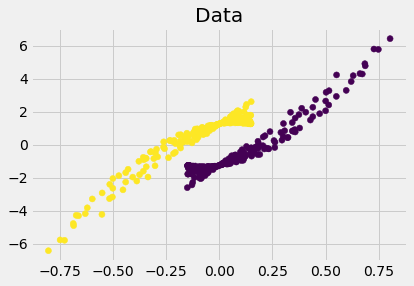

In [3]:
data = pd.read_csv("data/classification/twosplashes.data", header=None, sep=" ")
labels = pd.read_csv("data/classification/twosplashes.labels0", header=None)
labels = labels.values[:, 0] - 1
data.head()
plt.scatter(data[0], data[1], c=labels);
plt.title("Data")

# Data preparation

x_train = data[[0, 1]].values.transpose()
x_train = add_one_feature(x_train)
y_train = one_hot_encode(labels, 2)

x_train.shape, y_train.shape

In [4]:
def train_and_plot_net(net, **kwargs):
    net.fit(x_train, y_train, **kwargs)
    y_pred = net(x_train)
    y_hat = one_hot_decode(y_pred)
    accuracy = np.mean(y_hat == labels)
    print("Accuracy: {}".format(accuracy))
    plot_decision_regions(data[[0, 1]].values, y_train[0], net)

100%|██████████| 100000/100000 [00:14<00:00, 7076.03it/s]


Training completed. Loss: 0.001340992575035654
Accuracy: 1.0


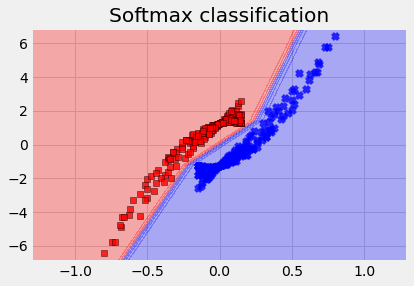

In [6]:
net = NeuralNetwork(3, [(10, Relu()), (2, Softmax())], MultinomialLoss(), sd=1e-2)
train_and_plot_net(net, lr=0.01, n_iter=100_000)
plt.title("Softmax classification");

## Multiclass classification 

,x,y,cls
0,0.198160,0.454931,1
1,0.209147,0.892021,1
2,0.372018,0.166785,1
3,0.268200,0.189422,1
4,0.238494,0.462153,1


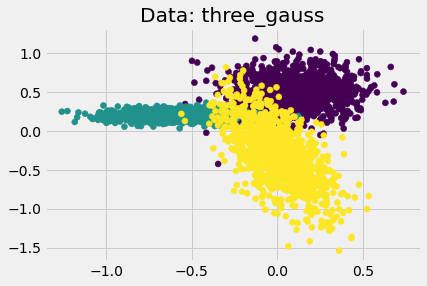

In [7]:
data_train = pd.read_csv("data/classification/data.three_gauss.train.1000.csv")
data_test = pd.read_csv("data/classification/data.three_gauss.test.500.csv")

labels_train = data_train.cls.values - 1
labels_test = data_test.cls.values - 1

plt.scatter(data_train.x, data_train.y, c=labels_train)
plt.title("Data: three_gauss")
data_train.head()

In [8]:
data_train.head()

,x,y,cls
0,0.198160,0.454931,1
1,0.209147,0.892021,1
2,0.372018,0.166785,1
3,0.268200,0.189422,1
4,0.238494,0.462153,1


In [140]:
def get_x(data):
    x_train = data[["x", "y"]].values.transpose()
    return add_one_feature(x_train)

x_train = get_x(data_train)
y_train = one_hot_encode(labels_train, n_classes=3)

x_test = get_x(data_test)
y_test = labels_test

In [141]:
net = NeuralNetwork(3, [(10, Relu()), (3, Softmax())], MultinomialLoss(), sd=1e-2)
net.fit(x_train, y_train, lr=0.01, n_iter=50_000)

100%|██████████| 50000/50000 [00:33<00:00, 1472.93it/s]

Training completed. Loss: 0.17679836136736338


In [144]:
y_pred = one_hot_decode(net(x_test))
print("Accuracy:", np.mean(y_pred == y_test))

Accuracy: 0.936


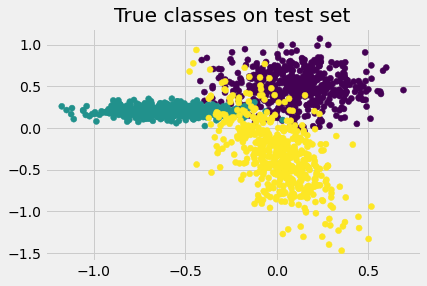

In [149]:
plt.scatter(data_test.x, data_test.y, c=data_test.cls)
plt.title("True classes on test set");

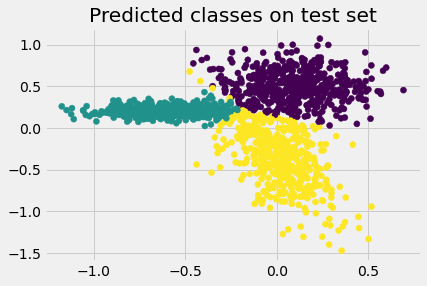

In [153]:
plt.scatter(data_test.x, data_test.y, c=y_pred)
plt.title("Predicted classes on test set");

As we see, the classifier could not correctly classify all examples because of the noise in the data.